In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.linear_model import SGDClassifier,Ridge,Lasso

In [3]:
#read the dataset
telecom_df=pd.read_csv('Telco_Customer_Churn_Data.csv')
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#to know the shape,no.of columns in the dataset
print(telecom_df.shape)
print(telecom_df.columns)
print(telecom_df.shape[0])

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
7043


In [5]:
#continuous_cols
cont_cols=[col for col in telecom_df.columns if telecom_df[col].dtype=='int64' or telecom_df[col].dtype=='float64']
cont_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [6]:
#categorical_cols
cat_cols=[col for col in telecom_df.columns if telecom_df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [7]:
#check for the null values percentages
#pd.DataFrame({'col_name':telecom_df.columns,'na_pc':telecom_df.isnull().sum()/telecom_df.shape[0]*100})

In [8]:
#To convert boolean o/p into integers
telecom_df['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [9]:
#giving name to target column
y=telecom_df['Churn']

In [10]:
#telecom_df['Churn'].replace('Yes',1,inplace=True)
#telecom_df['Churn'].replace('No',0,inplace=True)

# chi_square test(function)

In [11]:
from scipy.stats import chi2_contingency as chi
chi_corr_cat_cols=[]
chi_non_corr_cols=[]
def chi_square(df,out_column):
    cat_cols=[col for col in df.columns if df[col].dtype=='object']
    for col in cat_cols:
        contingency_table=pd.crosstab(df[col],df[out_column])
        p_value=chi(contingency_table)[1]
        if p_value<0.05:
            chi_corr_cat_cols.append(col)
        else:
            chi_non_corr_cols.append(col)
    
chi_square(telecom_df,'Churn')

print(chi_corr_cat_cols)

['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [12]:
print(chi_non_corr_cols)

['customerID', 'gender', 'PhoneService', 'TotalCharges']


# using functions(anova)

In [13]:
from scipy.stats import f_oneway
anova_corr_cols=[]
anova_non_corr_cols=[]

for col in cont_cols:

    y_list=list(telecom_df[telecom_df['Churn']==1][col])
    n_list=list(telecom_df[telecom_df['Churn']==0][col])
    p_value=f_oneway(y_list,n_list)[1]
    if p_value<0.05:
        anova_corr_cols.append(col)
    else:
        anova_non_corr_cols.append(col)
print(anova_corr_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [14]:
print(anova_non_corr_cols)

[]


In [15]:
#non_sense columns
non_sense_cols=[]
for col in telecom_df.columns:
    if telecom_df[col].nunique()==1 or telecom_df[col].nunique()==telecom_df.shape[0]:
        non_sense_cols.append(col)
print(non_sense_cols) # no non_sense cols to drop

['customerID']


In [16]:
#telecom_df['TotalCharges']=telecom_df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [17]:
#telecom_df['TotalCharges']=telecom_df['TotalCharges'].astype('float64')

# dropping 

In [18]:
drop_cols=chi_non_corr_cols
drop_cols.append('Churn')

telecom_df.drop(columns=drop_cols,inplace=True)

# Train_Test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(telecom_df,y,test_size=0.2,random_state=42)


# filling missing values

In [20]:
cont_cols=[col for col in telecom_df.columns if telecom_df[col].dtype=='int64' or telecom_df[col].dtype=='float64']
cat_cols=[col for col in telecom_df.columns if telecom_df[col].dtype=='object']

for col in cont_cols:
    X_train[col].fillna(X_train[col].mean(),inplace=True)
    X_test[col].fillna(X_train[col].mean(),inplace=True)
    
for col in cat_cols:
    X_train[col].fillna(X_train[col].mode()[0],inplace=True)
    X_test[col].fillna(X_train[col].mode()[0],inplace=True)

# scaling

In [21]:
scaler=StandardScaler()
#cont_cols
for col in cont_cols:
    
    X_train[col]=scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=scaler.transform(np.array(X_test[col]).reshape(-1,1))

#cat_cols
oe_train=pd.get_dummies(X_train[cat_cols])

oe_test=pd.get_dummies(X_test[cat_cols])


# merging

In [22]:
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)

# concatenating

In [23]:
X_train_final=pd.concat([X_train[cont_cols],oe_train_final],axis=1)
X_test_final=pd.concat([X_test[cont_cols],oe_test_final],axis=1)

In [24]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# model

In [25]:
logreg=LogisticRegression()

logreg.fit(X_train_final,y_train) 

pred=logreg.predict(X_test_final)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
probabs=logreg.predict_proba(X_test_final)

pos_probabs=probabs[::,1] # getting only positive values


fpr,tpr,threshold=roc_curve(y_test,pos_probabs) 

fpr,tpr,threshold 

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.65250965e-04,
        9.65250965e-04, 1.93050193e-03, 1.93050193e-03, 2.89575290e-03,
        2.89575290e-03, 3.86100386e-03, 3.86100386e-03, 4.82625483e-03,
        4.82625483e-03, 5.79150579e-03, 5.79150579e-03, 6.75675676e-03,
        6.75675676e-03, 8.68725869e-03, 8.68725869e-03, 9.65250965e-03,
        9.65250965e-03, 1.15830116e-02, 1.15830116e-02, 1.25482625e-02,
        1.25482625e-02, 1.35135135e-02, 1.35135135e-02, 1.44787645e-02,
        1.44787645e-02, 1.54440154e-02, 1.54440154e-02, 1.64092664e-02,
        1.64092664e-02, 1.73745174e-02, 1.73745174e-02, 1.93050193e-02,
        1.93050193e-02, 2.02702703e-02, 2.02702703e-02, 2.12355212e-02,
        2.12355212e-02, 2.22007722e-02, 2.22007722e-02, 2.31660232e-02,
        2.31660232e-02, 2.50965251e-02, 2.50965251e-02, 2.60617761e-02,
        2.60617761e-02, 2.70270270e-02, 2.70270270e-02, 2.89575290e-02,
        2.89575290e-02, 2.99227799e-02, 2.99227799e-02, 3.088803

# AUC_ROC CURVE

Text(0.5, 1.0, 'AUC_ROC_CURVE')

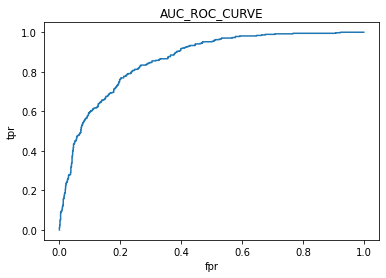

In [27]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUC_ROC_CURVE')

In [28]:
confusion_matrix(y_test,pred)

array([[937,  99],
       [155, 218]], dtype=int64)

In [29]:
precision_score(y_test,pred)

0.6876971608832808

In [30]:
recall_score(y_test,pred)

0.5844504021447721

In [31]:
f1_score(y_test,pred)

0.6318840579710144

# test_accuracy

In [32]:
accuracy_score(y_test,pred)

0.8197303051809794

# train_accuracy

In [33]:
pred1=logreg.predict(X_train_final)

accuracy_score(y_train,pred1)

0.8008519701810437

# Lasso&Ridge

In [34]:
stochastic=SGDClassifier(penalty='l1',alpha=0.01,verbose=1)

stochastic.fit(X_train_final,y_train)

-- Epoch 1
Norm: 25.61, NNZs: 8, Bias: -1.719401, T: 5634, Avg. loss: 0.586004
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 25.77, NNZs: 11, Bias: -1.688356, T: 11268, Avg. loss: 0.489838
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.85, NNZs: 11, Bias: -1.631553, T: 16902, Avg. loss: 0.481801
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 25.90, NNZs: 11, Bias: -1.665231, T: 22536, Avg. loss: 0.477696
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 25.93, NNZs: 11, Bias: -1.665651, T: 28170, Avg. loss: 0.477444
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 25.95, NNZs: 11, Bias: -1.753325, T: 33804, Avg. loss: 0.475797
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 25.97, NNZs: 11, Bias: -1.712611, T: 39438, Avg. loss: 0.475522
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 25.99, NNZs: 10, Bias: -1.728511, T: 45072, Avg. loss: 0.474900
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 26.01, NNZs: 11, Bias: -1.747995, T: 50706, Avg. loss: 0.

SGDClassifier(alpha=0.01, penalty='l1', verbose=1)

In [35]:
coeffs=stochastic.coef_
coeffs

array([[ 0.08246063, -0.73745454,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.12931357,  0.        ,  0.        ,
         0.        ,  0.93317248,  0.        ,  0.2292507 ,  0.        ,
         0.        ,  0.03382273,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.16710527,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.08123562,  0.08929018,  0.        ,  0.        , -0.13615535,
         0.        ,  0.        ,  0.        ,  0.34066484,  0.        ]])

In [36]:
len(coeffs[coeffs==0])

29

In [37]:
train_pred_lasso=stochastic.predict(X_train_final)
test_pred_lasso=stochastic.predict(X_test_final)

# accuracy_score(Lasso)

In [38]:
print('train Score:',accuracy_score(y_train,train_pred_lasso))
print('test Score:',accuracy_score(y_test,test_pred_lasso))


train Score: 0.7976570820021299
test Score: 0.8168914123491838


# Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion="entropy",min_samples_split=2,splitter='best',min_samples_leaf=1, max_depth=None)

dtc.fit(X_train_final,y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
preddtc=dtc.predict(X_test_final) # returns the probabilities
probabs=dtc.predict_proba(X_test_final)
pos_probabs=probabs[::,1]  # returns the positive[1] probabilities

fpr,tpr,threshold=roc_curve(y_test,pos_probabs) # y_test-->y_true,pos_probabs-->y_score

fpr,tpr,threshold 


(array([0.        , 0.17567568, 0.17664093, 0.18050193, 0.18243243,
        1.        ]),
 array([0.        , 0.46112601, 0.46112601, 0.46648794, 0.47184987,
        1.        ]),
 array([2.        , 1.        , 0.66666667, 0.5       , 0.33333333,
        0.        ]))

0.6422425393605017

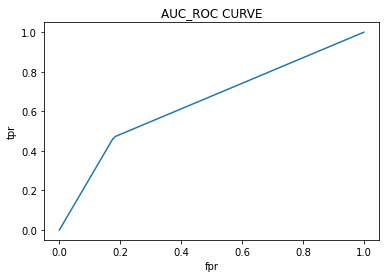

In [41]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('AUC_ROC CURVE')

roc_auc_score(y_test,preddtc)

In [42]:
accuracy_score(y_test,preddtc)

0.7274662881476224

In [43]:
preddtc1=dtc.predict(X_train_final)
accuracy_score(y_train,preddtc1)

0.997515086971956

In [44]:
accuracy_score(y_test,preddtc)

0.7274662881476224

In [45]:
precision_score(y_test,preddtc)

0.48450704225352115

In [46]:
recall_score(y_test,preddtc)

0.46112600536193027

# hyperparameter tuning

# grid searchcv

In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
dtc_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9]
          }
gcv=GridSearchCV(dtc,param_grid=dtc_param_dict,cv=7,verbose=21)

gcv.fit(X_train_final,y_train)


Fitting 7 folds for each of 320 candidates, totalling 2240 fits
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.795, total=   0.0s
[CV] max_depth=4, max_leaf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.770,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s



[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.795, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.780

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s



[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.795, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.795, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, score=0.777,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, score=0.795,

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, score=0.795,

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, score=0.770,

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, score=0.777, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, score=0.806,

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.806, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, score=0.777,

[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.814, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7 
[CV]  max_dep

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, score=0.772, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, score=0.802,

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, score=0.772, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, score=0.814, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, score=0.780,

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, score=0.772, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.814,

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.783, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, score=0.772,

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.814, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.783, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.770, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.802, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.780,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.806, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.780,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.806, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.795, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.777,

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.806, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.795, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.780,

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.802,

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.780,

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.790,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.770,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, score=0.787, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.814,

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.790, total=   0.1s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.814, total=   0.1s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.780,

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, score=0.782, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.783,

[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, score=0.782, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_dep

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, score=0.782, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.790, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.814, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.783, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, score=0.802,

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, score=0.777, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, score=0.770,

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.795, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.780, total=   0.1s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, score=0.777, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.780,

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.795, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, score=0.777, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.790,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.802, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, score=0.780,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, score=0.787, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.806, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, score=0.802,

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, score=0.787, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, score=0.770,

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.802, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, score=0.787, total=   0.1s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.814,

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.802, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, score=0.787, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.790,

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, score=0.787, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.783, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.802,

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, score=0.782, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.790, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.814, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.783, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.770,

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.783, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.770, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.802, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.780, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, score=0.782, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.790,

[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.806, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.795, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3 
[CV]  max_dep

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.806, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.795, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, score=0.777,

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, score=0.777, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.806, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, score=0.795,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.806, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, score=0.780,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, score=0.787, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, score=0.790,

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.806, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, score=0.787,

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, score=0.780,

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, score=0.787, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.814, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, score=0.780,

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.814, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, score=0.787,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, score=0.782, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, score=0.814, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, score=0.783, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, score=0.770,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, score=0.782, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.790, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.814, total=   0.1s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.783, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, score=0.770,

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.783, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.770, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.802, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.780, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, score=0.782, total=   0.0s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, score=0.790,

[Parallel(n_jobs=1)]: Done 2240 out of 2240 | elapsed:  1.3min finished


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7]},
             verbose=21)

In [48]:
gcv.best_score_

0.78913705650982

In [49]:
gcv.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [50]:
gcv_test_pred=gcv.predict(X_test_final)
gcv_train_pred=gcv.predict(X_train_final)

In [51]:
print('train accuracy:',accuracy_score(y_train,gcv_train_pred))
print('test accuracy:',accuracy_score(y_test,gcv_test_pred))

train accuracy: 0.7953496627618033
test accuracy: 0.794889992902768


# Randomised searchcv

In [52]:
#decision tree
from sklearn.model_selection import RandomizedSearchCV
dtc=DecisionTreeClassifier()
dtcrandom_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9]
          }
rmcv=RandomizedSearchCV(dtc,param_distributions=dtcrandom_param_dict,cv=7,verbose=31,n_iter=30)

rmcv

RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=31)

In [53]:
rmcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.790, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.806, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.780, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.770, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.802, total=   0.0s
[CV] min_samples_split=7, mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.780, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=7, max_depth=4, score=0.777, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.790, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.814, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.783, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.770,

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.802, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.780, total=   0.0s
[CV] min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.782, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.790, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.814, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.783,

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s remaining:    0.0s



[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.770, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.802, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.780, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=9, max_depth=4, score=0.772, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.790, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_sa

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s remaining:    0.0s



[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.783, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.770, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.802, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.780, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=9, max_depth=7, score=0.782, total=   0.0s

[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.9s remaining:    0.0s



[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.790, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.806, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.780, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.770, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.795, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_sa

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s remaining:    0.0s



[CV] min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7 
[CV]  min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=6, max_depth=7, score=0.777, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.790, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.806, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.780, total=   0.1s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5, score=0.770, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=6, max_depth=5 
[CV]  min_sa

[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.790, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.814, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.783, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.770, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.802, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6 
[CV]  min_samples_split=3, min_samples_leaf=4, max_leaf_nodes=9, max_depth=6, score=0.780,

[CV]  min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=5, score=0.780, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=5 
[CV]  min_samples_split=4, min_samples_leaf=6, max_leaf_nodes=6, max_depth=5, score=0.777, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.790, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.806, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.780, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=7, max_depth=7, score=0.770,

[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.802, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.780, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7 
[CV]  min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=9, max_depth=7, score=0.782, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4, score=0.790, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4, score=0.806, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4 
[CV]  min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=7, max_depth=4, score=0.780,

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    7.2s finished


RandomizedSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7]},
                   verbose=31)

In [54]:
rmcv.best_score_

0.78913705650982

In [55]:
predrmcv=rmcv.predict(X_test_final) # returns the probabilities
probabsrmcv=rmcv.predict_proba(X_test_final)
pos_probabsrmcv=probabsrmcv[::,1]  # returns the positive[1] probabilities
fpr,tpr,threshold=roc_curve(y_test,pos_probabsrmcv) # y_test-->y_true,pos_probabs-->y_score

fpr,tpr,threshold 


(array([0.        , 0.00675676, 0.05888031, 0.08687259, 0.20656371,
        0.253861  , 0.43629344, 0.57046332, 1.        ]),
 array([0.        , 0.12868633, 0.39142091, 0.46648794, 0.73458445,
        0.79892761, 0.91152815, 0.95174263, 1.        ]),
 array([1.86111111, 0.86111111, 0.64628099, 0.57258065, 0.40570175,
        0.31924883, 0.20432432, 0.16666667, 0.03995848]))

0.6898076743921248

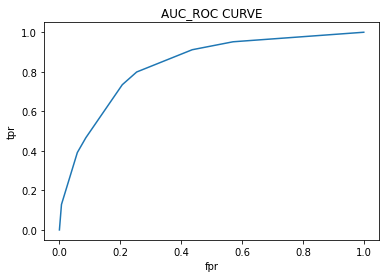

In [56]:
plt.plot(fpr,tpr)

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('AUC_ROC CURVE')

roc_auc_score(y_test,predrmcv)

In [57]:
dtcv_test_pred=rmcv.predict(X_test_final)
dtcv_train_pred=rmcv.predict(X_train_final)

In [58]:
print('train accuracy:',accuracy_score(y_train,dtcv_train_pred)) # train accuracy
print('test accuracy:',accuracy_score(y_test,dtcv_test_pred)) # test accuracy

train accuracy: 0.7953496627618033
test accuracy: 0.794889992902768


# Random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(X_train_final,y_train)
predrfc=rfc.predict(X_test_final)


In [60]:
accuracy_score(y_test,predrfc) #test accuracy

0.794180269694819

In [61]:
predrfc1=rfc.predict(X_train_final) # train predictions

accuracy_score(y_train,predrfc1) # train accuracy

0.997515086971956

# hyperparameter tuning


# Grid search

In [62]:
#random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
random_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9],
            'n_estimators':[50,60,70,80]
                           
          }
gcvrfc=GridSearchCV(rfc,param_grid=random_param_dict,cv=7,verbose=21)

gcvrfc.fit(X_train_final,y_train)

Fitting 7 folds for each of 1280 candidates, totalling 8960 fits
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.774, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.773, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.788, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.773, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.797, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    5.0s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.791, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.4s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.9s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.3s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.7s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.2s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.802, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.774, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.798, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.802, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.776, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.797, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.784, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.774, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.805, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.773, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.798, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.783, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.773, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.794, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.776, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.773, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.785, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.798, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.770, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.798, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.779, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.801, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.793, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.798, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.770, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.786, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.774, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.771, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.797, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.798, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.800, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.786, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.779, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.805, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.794, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.791, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.798, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.798, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.807, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.785, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.785, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.771, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.778, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.792, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.771, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.788, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.784, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.801, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.788, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.778, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.805, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.778, total=   0.6s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.797, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.802, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.807, total=   0.5s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.804, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.770, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.790, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.805, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.773, total=   0.6s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.798, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth

[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.806, total=   0.4s
[CV] max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=4, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.776, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.786, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.798, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.771, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.792, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.781, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.787, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.788, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.798, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.775, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.794, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.786, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.795, total=   0.6s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.774, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.771, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.771, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.797, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.787, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.771, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.804, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.785, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.802, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.805, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.806, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.769, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.788, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.792, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.776, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.789, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.783, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.802, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.797, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.785, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.780, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.802, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.802, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.804, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.771, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.771, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.776, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.794, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.804, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.774, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.797, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.810, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.784, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.806, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.796, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.791, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.806, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.802, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.801, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.800, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.805, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.800, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.775, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.802, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.771, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.797, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.789, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.795, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.792, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.793, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.806, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.805, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.790, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.771, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.798, total=   0.6s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.784, total=   0.6s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.795, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.778, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.796, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.807, total=   0.4s
[CV] max_depth

[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.814, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.786, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.783, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=5, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.794, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.781, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.778, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.776, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.786, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.788, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.775, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.773, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.792, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.770, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.775, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.798, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.771, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.783, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.774, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.801, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.778, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.798, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.798, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.774, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.794, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.802, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.781, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.769, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.781, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.807, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.802, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.774, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.804, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.778, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.774, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.788, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.805, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.788, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.779, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.790, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.804, total=   0.6s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.802, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.775, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.798, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.799, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.787, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.785, total=   0.6s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.795, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.806, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.773, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.773, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.792, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.802, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.802, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.793, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.795, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.776, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.807, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.804, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.771, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.797, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.805, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.786, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.797, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.812, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.802, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.788, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.785, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.801, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.783, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.791, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.785, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.809, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.811, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.794, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.789, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.788, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.804, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.790, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.775, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.798, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.802, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.778, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.809, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.790, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.804, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.781, total=   0.7s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.778, total=   0.6s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.796, total=   0.7s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.779, total=   0.6s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.788, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.802, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.794, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.805, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.802, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.784, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.794, total=   0.6s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.786, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.794, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.785, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.809, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth

[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=6, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.792, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.789, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.773, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=5, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=6, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.785, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.770, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.794, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.775, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.789, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.776, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5, n_estimators=80, score=0.774, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.778, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.793, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=7, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.792, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.798, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.780, total=   0.6s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.786, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=4, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.793, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.787, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.790, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=6, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.783, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.796, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.781, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.773, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=5, min_samples_split=7, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=3, n_estimators=80, score=0.792, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.798, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5, n_estimators=60, score=0.775, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.769, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=6, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.781, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.798, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.793, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=4, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.804, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.779, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.788, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=3, min_samples_split=7, n_estimators=50, score=0.795, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.799, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.801, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=4, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.774, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=6, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=60, score=0.791, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=4, min_samples_split=7, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=3, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.788, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=5, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.810, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.784, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=6, n_estimators=70, score=0.802, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.794, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=5, min_samples_split=7, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.788, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.802, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=4, n_estimators=60, score=0.771, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=5, n_estimators=70, score=0.797, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=6, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.805, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=7, min_samples_leaf=6, min_samples_split=7, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.776, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.796, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=3, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=4, n_estimators=80, score=0.805, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.788, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.809, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.770, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=6, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.800, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=3, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.784, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.778, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.794, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.792, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=6, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.801, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.781, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.790, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=4, min_samples_split=7, n_estimators=80, score=0.776, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.779, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=4, n_estimators=60, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.786, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.785, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.774, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.801, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.802, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.775, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=6, n_estimators=80, score=0.792, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=50, score=0.800, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=3, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.769, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=4, n_estimators=70, score=0.795, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.780, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=5, n_estimators=80, score=0.791, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.791, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.804, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=6, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.788, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.804, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.776, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.792, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.784, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=3, n_estimators=80, score=0.805, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.783, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.805, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.775, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.799, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=60, score=0.795, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=6, n_estimators=70, score=0.788, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=70, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.785, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.806, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=3, min_samples_split=7, n_estimators=80, score=0.778, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.773, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.775, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.780, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.789, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.799, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.788, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.804, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.789, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.773, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.796, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=4, min_samples_split=6, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.780, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.806, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.781, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=3, n_estimators=60, score=0.806, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.781, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.805, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.791, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.775, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.793, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.771, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.779, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=5, n_estimators=80, score=0.797, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=6, n_estimators=50, score=0.785, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=50, score=0.796, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.786, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.784, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=5, min_samples_split=7, n_estimators=60, score=0.778, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.789, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.771, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.799, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.779, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=3, n_estimators=70, score=0.796, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.783, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=4, n_estimators=80, score=0.799, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.790, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.801, total=   0.3s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=5, n_estimators=50, score=0.786, total=   0.3s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.800, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.785, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.774, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.794, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=6, n_estimators=60, score=0.779, total=   0.4s
[CV] max_depth

[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.798, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.783, total=   0.4s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=70, score=0.795, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.788, total=   0.5s
[CV] max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=80 
[CV]  max_depth=7, max_leaf_nodes=9, min_samples_leaf=6, min_samples_split=7, n_estimators=80, score=0.810, total=   0.5s
[CV] max_depth

[Parallel(n_jobs=1)]: Done 8960 out of 8960 | elapsed: 62.9min finished


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 60, 70, 80]},
             verbose=21)

In [63]:
gcvrfc.best_score_

0.794108870024324

In [64]:
gcvrfc.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 50}

In [65]:
gcvrfc_test_pred=gcvrfc.predict(X_test_final)
gcvrfc_train_pred=gcvrfc.predict(X_train_final)

In [66]:
print('train accuracy:',accuracy_score(y_train,gcvrfc_train_pred))
print('test accuracy:',accuracy_score(y_test,gcvrfc_test_pred))

train accuracy: 0.7946396876109336
test accuracy: 0.794889992902768


# Randomised searchcv

In [67]:
#random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfcrandomcv_param_dict={'max_depth':[4,5,6,7],
           'min_samples_split':[3,4,5,6,7],
           'min_samples_leaf':[3,4,5,6],
           'max_leaf_nodes':[6,7,8,9],
            'n_estimators':[30,50,40,20]
          }
randomforestcv=RandomizedSearchCV(rfc,param_distributions=rfcrandomcv_param_dict,cv=7,verbose=31,n_iter=30)
randomforestcv

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7],
                                        'n_estimators': [30, 50, 40, 20]},
                   verbose=31)

In [68]:
randomforestcv.fit(X_train_final,y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.785, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.806, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.791, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.770, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.794, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.775, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.796, total=   0.1s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.788, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.809, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.784, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.775, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.795, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.778, total=   0.2s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=6, max_leaf_nodes=9, max_depth=6, score=0.799, total=   0.1s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.789, total=   0.1s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 
[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.795, total=   0.2s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.790, total=   0.2s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.773, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.790, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.778, total=   0.3s
[CV] n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5 


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=9, max_depth=5, score=0.794, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.790, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.801, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.781, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.776, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.794, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.779, total=   0.3s
[CV] n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7 


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=6, min_samples_leaf=6, max_leaf_nodes=6, max_depth=7, score=0.792, total=   0.3s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    6.4s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.793, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.796, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.778, total=   0.3s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.774, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.788, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.775, total=   0.2s
[CV] n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6 
[CV]  n_estimators=40, min_samples_split=3, min_samples_leaf=6, max_leaf_nodes=6, max_depth=6, score=0.787, total=   0.2s
[CV] n_estimat

[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.775, total=   0.2s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=7, max_depth=5, score=0.796, total=   0.3s
[CV] n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.789, total=   0.2s
[CV] n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.798, total=   0.2s
[CV] n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=5, max_leaf_nodes=7, max_depth=7, score=0.779, total=   0.2s
[CV] n_estimat

[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.811, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.780, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.776, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.789, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=4, max_leaf_nodes=8, max_depth=4, score=0.776, total=   0.1s
[CV] n_estimat

[CV]  n_estimators=30, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.791, total=   0.2s
[CV] n_estimators=30, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=30, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.773, total=   0.2s
[CV] n_estimators=30, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4 
[CV]  n_estimators=30, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=6, max_depth=4, score=0.797, total=   0.2s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.794, total=   0.1s
[CV] n_estimators=20, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=20, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.804, total=   0.1s
[CV] n_estimat

[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.786, total=   0.3s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.804, total=   0.2s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.788, total=   0.2s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.775, total=   0.2s
[CV] n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6 
[CV]  n_estimators=40, min_samples_split=7, min_samples_leaf=5, max_leaf_nodes=8, max_depth=6, score=0.789, total=   0.2s
[CV] n_estimat

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   49.4s finished


RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_leaf_nodes': [6, 7, 8, 9],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6, 7],
                                        'n_estimators': [30, 50, 40, 20]},
                   verbose=31)

In [69]:
randomforestcv.best_score_

0.7926878473647733

In [70]:
randomforestcv_test_pred=randomforestcv.predict(X_test_final)
randomforestcv_train_pred=randomforestcv.predict(X_train_final)

In [71]:
print('train accuracy:',accuracy_score(y_train,randomforestcv_train_pred)) 
print('test accuracy:',accuracy_score(y_test,randomforestcv_test_pred)) 

train accuracy: 0.7893148739794107
test accuracy: 0.7963094393186657
